In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('historical_approvals.csv')

In [14]:
df.shape

(3217, 7)

In [8]:
df.head()

,company,drug_name,submission_type,submission_number,submission_status,submission_status_date,submission_class_code
0,LUPIN PHARMS,DESLORATADINE,ORIG,1,AP,20101025,NaN
1,LUPIN PHARMS,DESLORATADINE,SUPPL,7,AP,20191022,LABELING
2,LUPIN PHARMS,DESLORATADINE,SUPPL,5,AP,20191022,LABELING
3,AIPING PHARM INC,LAMOTRIGINE,SUPPL,12,AP,20220118,LABELING
4,AIPING PHARM INC,LAMOTRIGINE,SUPPL,10,AP,20220118,LABELING


In [6]:
df.sample(10)

,company,drug_name,submission_type,submission_number,submission_status,submission_status_date,submission_class_code
3064,IPCA LABS LTD,LOSARTAN POTASSIUM AND HYDROCHLOROTHIAZIDE,SUPPL,8,AP,20220829,LABELING
1652,SHIRE HUMAN GENETIC,VPRIV,SUPPL,9,AP,20130326,LABELING
1148,GE HEALTHCARE,HYPAQUE,SUPPL,18,AP,19760625,LABELING
570,TEVA,TORSEMIDE,ORIG,1,AP,20020514,NaN
3141,MALLINCKRODT IRELAND,ACTHAR GEL,SUPPL,16,AP,19771005,LABELING
2591,SCIEGEN PHARMS INC,FLUOXETINE HYDROCHLORIDE,ORIG,1,AP,20020627,NaN
518,HOSPIRA,METHYLDOPATE HYDROCHLORIDE,SUPPL,13,AP,19941103,LABELING
2230,ROXANE,ORLAAM,SUPPL,2,AP,19970716,MANUF (CMC)
228,BOEHRINGER INGELHEIM,ATROVENT,SUPPL,4,AP,19890316,LABELING
3051,HOSPIRA,AMINOPHYLLINE,SUPPL,11,AP,19981201,MANUF (CMC)


In [18]:
df['submission_type'].unique()

array(['ORIG', 'SUPPL'], dtype=object)

In [22]:
#Extract only 'ORIG' submission type 
df[df['submission_type'] == 'ORIG']

,company,drug_name,submission_type,submission_number,submission_status,submission_status_date,submission_class_code
0,LUPIN PHARMS,DESLORATADINE,ORIG,1,AP,20101025,NaN
8,AIPING PHARM INC,LAMOTRIGINE,ORIG,1,AP,20090127,NaN
9,CHARTWELL RX,IRINOTECAN HYDROCHLORIDE,ORIG,1,AP,20100415,NaN
15,DR REDDYS LABS INC,NEFAZODONE HYDROCHLORIDE,ORIG,1,AP,20030916,NaN
16,HIKMA,FENOLDOPAM MESYLATE,ORIG,1,AP,20041012,NaN
...,...,...,...,...,...,...,...
3211,MSN LABS PVT LTD,MACITENTAN,ORIG,1,TA,20230224,UNKNOWN
3212,TARO PHARM INDS LTD,NaN,ORIG,1,TA,20250116,UNKNOWN
3213,TORRENT,APREMILAST,ORIG,1,AP,20250620,UNKNOWN
3214,LABORATORIOS GRIFOLS,SODIUM CHLORIDE 0.9% IN PLASTIC CONTAINER,ORIG,1,AP,20170525,UNKNOWN


In [24]:
df1 = df[df['submission_type'] == 'ORIG']

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 3216
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   company                 433 non-null    object
 1   drug_name               425 non-null    object
 2   submission_type         433 non-null    object
 3   submission_number       433 non-null    int64 
 4   submission_status       433 non-null    object
 5   submission_status_date  433 non-null    int64 
 6   submission_class_code   237 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.1+ KB


In [40]:
df1.isnull().sum()

company                     0
drug_name                   8
submission_type             0
submission_number           0
submission_status           0
submission_status_date      0
submission_class_code     196
dtype: int64

In [44]:
#drop missing value from drug_name
df1 = df1.dropna(subset=['drug_name'])

In [48]:
df1['submission_class_code'].unique()

array([nan, 'TYPE 3', 'TYPE 1', 'UNKNOWN', 'TYPE 5', 'TYPE 6', 'TYPE 4',
       'TYPE 2/4', 'TYPE 2', 'EFFICACY', 'TYPE 1/4', 'TYPE 9'],
      dtype=object)

In [50]:
df1.groupby('submission_class_code')['submission_class_code'].count()

submission_class_code
EFFICACY      2
TYPE 1       25
TYPE 1/4      1
TYPE 2        2
TYPE 2/4      1
TYPE 3       29
TYPE 4        4
TYPE 5       21
TYPE 6        1
TYPE 9        1
UNKNOWN     142
Name: submission_class_code, dtype: int64

In [68]:
#drop submission_class_code column
df1 = df1[['company', 'drug_name', 'submission_type', 'submission_number',
       'submission_status', 'submission_status_date']]

In [72]:
df1.dtypes

company                   object
drug_name                 object
submission_type           object
submission_number          int64
submission_status         object
submission_status_date     int64
dtype: object

In [76]:
df1['submission_status_date'] = pd.to_datetime(df1['submission_status_date'], format='%Y%m%d', errors='coerce')

C:\Users\dagim\AppData\Local\Temp\ipykernel_19484\2395442932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['submission_status_date'] = pd.to_datetime(df1['submission_status_date'], format='%Y%m%d', errors='coerce')


In [84]:
df1.isnull().sum()

company                   0
drug_name                 0
submission_type           0
submission_number         0
submission_status         0
submission_status_date    0
dtype: int64

In [90]:
df1.reset_index(inplace=True)

In [100]:
df1.head()

,company,drug_name,submission_type,submission_number,submission_status,submission_status_date
0,LUPIN PHARMS,DESLORATADINE,ORIG,1,AP,2010-10-25
1,AIPING PHARM INC,LAMOTRIGINE,ORIG,1,AP,2009-01-27
2,CHARTWELL RX,IRINOTECAN HYDROCHLORIDE,ORIG,1,AP,2010-04-15
3,DR REDDYS LABS INC,NEFAZODONE HYDROCHLORIDE,ORIG,1,AP,2003-09-16
4,HIKMA,FENOLDOPAM MESYLATE,ORIG,1,AP,2004-10-12


In [112]:
df1[['company','drug_name']].nunique()

company      246
drug_name    341
dtype: int64

In [114]:
df1.shape

(425, 6)

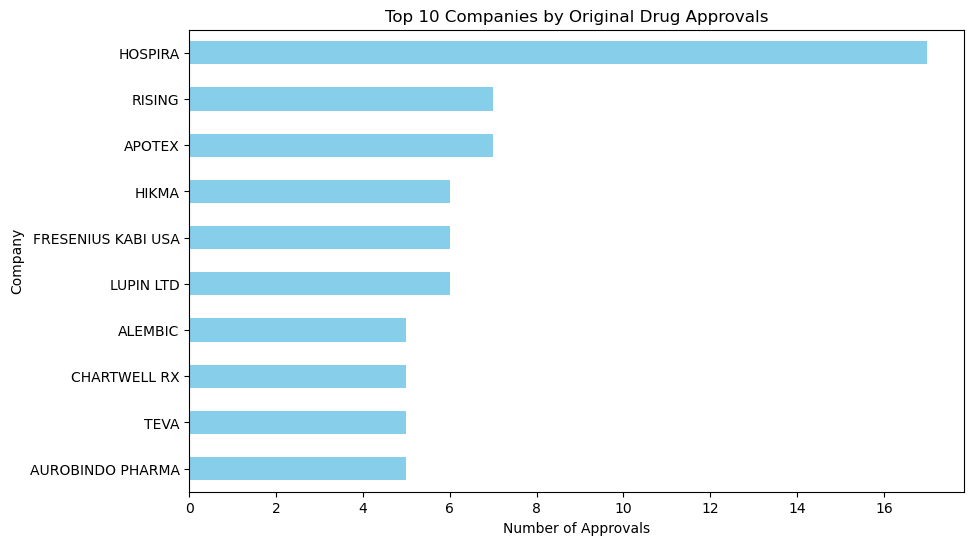

In [120]:
# Top 10 companies by original drug approvals
top_companies = df1['company'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_companies.plot(kind='barh', color='skyblue')
plt.title('Top 10 Companies by Original Drug Approvals')
plt.xlabel('Number of Approvals')
plt.ylabel('Company')
plt.gca().invert_yaxis()  
plt.show()

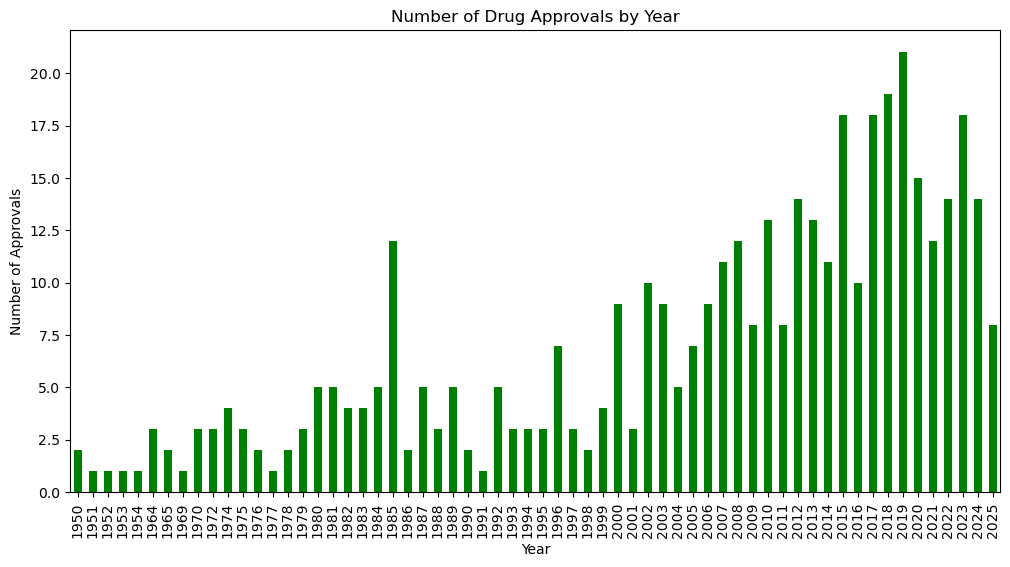

In [128]:
approvals_by_year = df1['submission_status_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12,6))
approvals_by_year.plot(kind='bar', color='green')
plt.title('Number of Drug Approvals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Approvals')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1.to_csv("ORIG_AP_Drugs.csv", index=False)